# Project: Wrangling and Analyze Data

# Introduction

The project is about wrangling WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive data was provided but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required. Hence image data (that predicts whether the animal is a dog or not) and retweet,count data was collated

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import os
import json
from wordcloud import WordCloud,STOPWORDS

In [2]:
rate_dog_data = pd.read_csv('twitter-archive-enhanced.csv')
rate_dog_data.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [3]:
#check for number of rows and columns
rate_dog_data.shape

(2356, 17)

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
#URL of the file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# get file with the image predictions
with open('image-predictions.tsv' , 'wb') as file:
    r = requests.get(url)
    file.write(r.content)

# load image data
image_data = pd.read_csv('image-predictions.tsv', sep = '\t')

In [5]:
#read the image data from the created folder
image_data = pd.read_csv('image_prediction/image-predictions.tsv',sep ='\t')

In [6]:
#check for number of rows and columns
image_data.shape

(2075, 12)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
#write the tweet-json content to tweet_json.txt

url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response = requests.get(url)
with open("tweet_json.txt", mode = 'wb') as file:
    file.write(response.content)

In [8]:
#read lines and open file using list comprehension
data = [json.loads(line) for line in open('tweet_json.txt', 'r')]

In [9]:
#store the result in a dataframe and output variables

id = []
likes = []
retweet = []

for i in data:
    id.append(i['id'])
    likes.append(i['favorite_count'])
    retweet.append(i['retweet_count'])
    
data_likes_retweet = pd.DataFrame({'tweet_id':id,'favorite_count':likes, 'retweet_count':retweet})

In [10]:
#print the first two rows
data_likes_retweet.head(2)

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514


In [11]:
#check for number of rows and columns
data_likes_retweet.shape

(2354, 3)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [12]:
#Drop rows containing retweet data
filtered_rate_dog_data  = rate_dog_data [rate_dog_data.retweeted_status_id.isnull()]
filtered_rate_dog_data.shape

(2175, 17)

In [13]:
#Drop rows having the first dog prediction to be "FAlSE"
filtered_image_data  = image_data[image_data['p1_dog'] == True]
filtered_image_data['p1_dog'].unique()

array([ True], dtype=bool)

# Assessing Visually

In [14]:
#check at random
filtered_rate_dog_data.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1992,672614745925664768,NaN,NaN,2015-12-04 03:13:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Norman. Doesn't bark much. Very docile...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672614745...,6,10,Norman,None,None,pupper,None
134,866686824827068416,NaN,NaN,2017-05-22 16:06:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lili. She can't believe you betrayed h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/866686824...,12,10,Lili,None,None,None,None
691,787322443945877504,NaN,NaN,2016-10-15 16:01:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lincoln. He forgot to use his blinker ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/787322443...,10,10,Lincoln,None,None,None,None
718,783466772167098368,NaN,NaN,2016-10-05 00:40:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Finn. He likes eavesdropping from fili...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/783466772...,11,10,Finn,None,None,None,None
901,758474966123810816,NaN,NaN,2016-07-28 01:31:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brandonald. He accidentally opened the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758474966...,11,10,Brandonald,None,None,None,None


In [15]:
#check at random
filtered_image_data.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1233,746131877086527488,https://pbs.twimg.com/media/ClrK-rGWAAENcAa.jpg,1,chow,0.575637,True,Pomeranian,0.195950,True,Norwich_terrier,0.141224,True
208,669970042633789440,https://pbs.twimg.com/media/CUw2MV4XIAAHLO_.jpg,1,miniature_pinscher,0.734744,True,Rottweiler,0.131066,True,Doberman,0.081509,True
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True
1754,824775126675836928,https://pbs.twimg.com/media/C3Iwlr0WYAARVh4.jpg,1,Border_terrier,0.610499,True,malinois,0.090291,True,Airedale,0.068625,True
474,675147105808306176,https://pbs.twimg.com/media/CV6atgoWcAEsdv6.jpg,1,golden_retriever,0.949215,True,Labrador_retriever,0.016765,True,flat-coated_retriever,0.010637,True


In [16]:
data_likes_retweet.sample(5)

,tweet_id,favorite_count,retweet_count
2112,670433248821026816,345,122
1213,715009755312439296,4550,1392
2211,668567822092664832,265,62
1742,679158373988876288,23568,9193
1495,692423280028966913,1618,265


# Assessing programatically

In [17]:
# check for missing values
filtered_rate_dog_data.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2097
in_reply_to_user_id           2097
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   58
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [18]:
filtered_rate_dog_data.describe()
#filtered_rate_dog_data_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.175000e+03,7.800000e+01,7.800000e+01,0.0,0.0,2175.000000,2175.000000
mean,7.371205e+17,7.455079e+17,2.014171e+16,NaN,NaN,13.215172,10.492874
std,6.748668e+16,7.582492e+16,1.252797e+17,NaN,NaN,47.725696,7.019084
min,6.660209e+17,6.658147e+17,1.185634e+07,NaN,NaN,0.000000,0.000000
25%,6.768432e+17,6.757419e+17,3.086374e+08,NaN,NaN,10.000000,10.000000
50%,7.098528e+17,7.038708e+17,4.196984e+09,NaN,NaN,11.000000,10.000000
75%,7.894226e+17,8.257804e+17,4.196984e+09,NaN,NaN,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,NaN,NaN,1776.000000,170.000000


The max value in rating numerator and rating denominator are very far from their mean values. There are outliers in the data. I also checked in the raw file (twitter_json.txt). Large numbers are not present there

In [19]:
# Check for the data type of each column
filtered_rate_dog_data.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [20]:
filtered_rate_dog_data['timestamp'].head()

0    2017-08-01 16:23:56 +0000
1    2017-08-01 00:17:27 +0000
2    2017-07-31 00:18:03 +0000
3    2017-07-30 15:58:51 +0000
4    2017-07-29 16:00:24 +0000
Name: timestamp, dtype: object

### Quality issues
1. filtered_rate_dog_data - column "in_reply_to_status_id" & "in_reply_to_user_id"  has almost 95% of its value missing

2. filtered_rate_dog_data - column "name" has 'a' as name of dog

3. filtered_rate_dog_data - columns "retweeted_status_id" & "retweeted_status_user_id" & "retweeted_status_timestamp" has almost its value missing

4. filtered_rate_dog_data - column "name" has 'None' as name of dog

5. filtered_rate_dog_data - column "rating_numerator" has Outliers

6. filtered_image_data - columns "p1, p2 and p3" has a mixed of lower and capitalized, hyphen and underscore characters 

7. filtered_rate_dog_data - columns of dog stages "doggo","floofer","pupper" and "puppo" has None as it value

8. filtered_rate_dog_data - column "timestamp" has the wrong data type

### Tidiness issues
1. filtered_rate_dog_data- Columns with Dog stages (doggo, floofer, pupper and puppo) does not represent observaional unit.The pieces of data constitute a single dataset and should be merged.

2. filtered_image_data - This data is part of the same observational unit as the data in the rate_dog_data, one table with information about dog ratings.

3. data_likes_retweet - This data is part of the same observational unit as the data in the rate_dog_data, one table with information about dog ratings.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [21]:
# Make copies of original pieces of data
filtered_rate_dog_data_clean = filtered_rate_dog_data.copy()
filtered_image_data_clean = filtered_image_data.copy()
data_likes_retweet_clean = data_likes_retweet.copy()

### Issue #1: Missing data in filtered_rate_dog_data_clean                                             ['in_reply_to_status_id']  and ['in_reply_to_user_id']          (2097 out of 2175 missing)

#### Define: Drop the column filtered_rate_dog_data_clean                                                                ['in_reply_to_status_id'] 

#### Code

In [22]:
filtered_rate_dog_data_clean.drop(["in_reply_to_status_id","in_reply_to_user_id"], axis=1, inplace=True)

#### Test

In [23]:
filtered_rate_dog_data_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Issue #2: filtered_rate_dog_data["name"] has 'a' as name of dog

#### Define : Replace "a" in the name column with "None", the mode of the column

#### Code

In [24]:
#replace a with None
print('a' in filtered_rate_dog_data_clean["name"].unique())
name_mode = filtered_rate_dog_data_clean["name"].mode()
filtered_rate_dog_data_clean["name"].replace({"a": 'name_mode'}, inplace=True)

True


#### Test

In [25]:
print('a' in filtered_rate_dog_data_clean["name"].unique())

False


### Issue #3:  Missing data in filtered_rate_dog_data_clean                                            ['retweeted_status_user_id'] and ['retweeted_status_id']                           and ['retweeted_status_timestamp'] (2175 out of 2175                              missing)

#### Define : Drop the columns filtered_rate_dog_data_clean                                                                ['retweeted_status_user_id'] and ['retweeted_status_id']

#### Code

In [26]:
filtered_rate_dog_data_clean.drop(["retweeted_status_id","retweeted_status_user_id","retweeted_status_timestamp"], axis=1, inplace=True)

#### Test

In [27]:
filtered_rate_dog_data_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Issue #4: filtered_rate_dog_data - column "name" has 'None' as name of dog

#### Define : Change "None" to Nan values to actually represent missing values

#### Code

In [28]:
print('None' in filtered_rate_dog_data_clean["name"].unique())
filtered_rate_dog_data_clean['name'] = filtered_rate_dog_data_clean['name'].replace('None',np.nan)

True


#### Test

In [29]:
print('None' in filtered_rate_dog_data_clean["name"].unique())

False


### Issue #5: filtered_rate_dog_data - column ["rating_numerator"] has Outliers

#### Define : Drop the rows containing outliers in filtered_rate_dog_data_clean                                                                ['rating_numerator']

#### Code

Check for rows having outliers using rating numerator column. I would use the Percentile method to check for outliers and drop the rows

In [30]:
Q1 = np.percentile(filtered_rate_dog_data_clean['rating_numerator'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(filtered_rate_dog_data_clean['rating_numerator'], 75,
                   interpolation = 'midpoint')

# interquartile range
IQR = Q3 - Q1
 
print("Old Shape: ", filtered_rate_dog_data_clean.shape)

print("Upper bound is {r} ".format(r = Q3+1.5*IQR))
print("Lower bound is {r} ".format (r = Q1-1.5*IQR))

#Remove rows containing the outliers
filtered_rate_dog_data_clean = filtered_rate_dog_data_clean.loc[(filtered_rate_dog_data_clean["rating_numerator"] >= 7) & (filtered_rate_dog_data_clean['rating_numerator'] <= 15)]

print("New Shape: ", filtered_rate_dog_data_clean.shape)

Old Shape:  (2175, 12)
Upper bound is 15.0 
Lower bound is 7.0 
New Shape:  (2027, 12)


#### Test

In [31]:
print(filtered_rate_dog_data_clean['rating_numerator'].max())
print(filtered_rate_dog_data_clean['rating_numerator'].min())

15
7


### Issue #6: filtered_image_data - columns "p1","p2" and "p3" has a mixed of lower and capitalized, hyphen and underscore characters 

#### Define : Format "p1,p2 and p3" columns to be all lower case and change all hypen,space to underscore and rename column name

#### Code

In [32]:
filtered_image_data_clean.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [33]:
#rename column and change to lower case and change all hypen,space to underscore
filtered_image_data_clean['p1'] = filtered_image_data_clean['p1'].str.lower().replace("-| ","_")
filtered_image_data_clean['p2'] = filtered_image_data_clean['p2'].str.lower().replace("-| ","_")
filtered_image_data_clean['p3'] = filtered_image_data_clean['p3'].str.lower().replace("-| ","_")
filtered_image_data_clean.rename(columns = {'p1':'p1_algorithm','p2':'p2_algorithm','p3':'p3_algorithm'}, inplace = True)

#### Test

In [34]:
filtered_image_data_clean[['p1_algorithm','p2_algorithm','p3_algorithm']].sample(5)

,p1_algorithm,p2_algorithm,p3_algorithm
1586,american_staffordshire_terrier,chihuahua,staffordshire_bullterrier
724,great_dane,irish_wolfhound,greater_swiss_mountain_dog
1583,cardigan,boston_bull,pembroke
1384,golden_retriever,labrador_retriever,border_terrier
165,golden_retriever,irish_setter,redbone


### Issue #7: filtered_rate_dog_data - columns of dog stages "doggo","floofer","pupper" and "puppo" has None as it value

#### Define : Replace "None" in this columns to actually represent missing values using np.nan

#### Code

In [35]:
# replace "None" with np.nan to indicate appropriate missing values
dog_col = ["doggo","floofer","pupper","puppo"]
filtered_rate_dog_data_clean[dog_col] = filtered_rate_dog_data_clean[dog_col].replace({'None':np.nan})

#### Test

In [36]:
filtered_rate_dog_data_clean[["doggo","floofer","pupper","puppo"]].sample(5)

,doggo,floofer,pupper,puppo
1581,NaN,NaN,NaN,NaN
103,NaN,NaN,NaN,NaN
504,NaN,NaN,NaN,NaN
2272,NaN,NaN,NaN,NaN
236,NaN,NaN,NaN,NaN


### Issue #8: filtered_rate_dog_data - column "timestamp" has the wrong data type

#### Define : Convert timestamp to date time from object type.

#### Code

In [37]:
filtered_rate_dog_data_clean['timestamp'] = pd.to_datetime(filtered_rate_dog_data_clean['timestamp'])

#### Test

In [38]:
filtered_rate_dog_data_clean['timestamp'].dtypes

dtype('<M8[ns]')

# Tidiness Issues

### Issue #9: filtered_rate_dog_data- Columns with Dog stages (doggo, floofer, pupper and puppo) does not represent observaional unit.

#### Define : Merge the four columns into one column called dog_stage

#### Code

In [39]:
print("Shape before concatenation : " ,filtered_rate_dog_data_clean.shape)

# create a new column to represent dog stages by merging all relevant columns
filtered_rate_dog_data_clean['dog_stage'] = filtered_rate_dog_data_clean[filtered_rate_dog_data_clean.columns[8:]].apply(
    lambda x: ','.join(x.dropna().astype(str)), axis=1)

filtered_rate_dog_data_clean['dog_stage'] = filtered_rate_dog_data_clean['dog_stage'].replace('',np.nan)

#drop columns after merging
filtered_rate_dog_data_clean.drop(["doggo","floofer","pupper","puppo"], axis=1, inplace=True)

print("Shape After concatenation : ", filtered_rate_dog_data_clean.shape)

Shape before concatenation :  (2027, 12)
Shape After concatenation :  (2027, 9)


#### Test

In [40]:
filtered_rate_dog_data_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN


In the new column (dog_stages), there are some dogs with two stages. I would pick the first one and drop the other because i think dog stage should be unique at a particular time

In [41]:
filtered_rate_dog_data_clean['dog_stage'] = filtered_rate_dog_data_clean['dog_stage'].map(lambda x: x.split(",")[0] if isinstance(x, str) else x)

### Issue #10: filtered_image_data - This data is part of the same observational unit as the data in the rate_dog_data, one table with information about dog ratings

#### Define : Merge the filtered_rate_dog_data table and  filtered_image_data table on common column ["tweet_id"]

#### Code

In [42]:
print("filtered_image_data_clean :" ,filtered_image_data_clean.shape)
print("filtered_rate_dog_data_clean :" ,filtered_rate_dog_data_clean.shape)

filtered_image_data_clean : (1532, 12)
filtered_rate_dog_data_clean : (2027, 9)


In [43]:
#check for dupliactes on the tweet_id before merging
first_duplicate = filtered_rate_dog_data_clean[filtered_rate_dog_data_clean.duplicated("tweet_id")]
second_duplicate = filtered_image_data_clean[filtered_image_data_clean.duplicated("tweet_id")]

print(first_duplicate)

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, dog_stage]
Index: []


I will use merge() with its default arguments, which will result in an inner join.This is will lead to lost of rows that don’t have a match in the other DataFrame’s key column.

In [44]:
rate_image_data = pd.merge(filtered_image_data_clean, filtered_rate_dog_data_clean)

#### Test

In [45]:
print("rate_image_data :" ,rate_image_data.shape)
rate_image_data.head(2)

rate_image_data : (1430, 20)


,tweet_id,jpg_url,img_num,p1_algorithm,p1_conf,p1_dog,p2_algorithm,p2_conf,p2_dog,p3_algorithm,p3_conf,p3_dog,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,NaN,NaN
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,name_mode,NaN


### Issue #11: data_likes_retweet - This data is part of the same observational unit as the data in the rate_dog_data, one table with information about dog ratings

#### Define : Merge the data_likes_retweet with filtered_rate_dog_data table on common column ["tweet_id"]

#### Code

In [46]:
all_rate_image_data = pd.merge(data_likes_retweet, rate_image_data)

#### Test

In [47]:
print("all_rate_image_data :" ,all_rate_image_data.shape)
all_rate_image_data.head(2)

all_rate_image_data : (1430, 22)


,tweet_id,favorite_count,retweet_count,jpg_url,img_num,p1_algorithm,p1_conf,p1_dog,p2_algorithm,p2_conf,...,p3_conf,p3_dog,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892177421306343426,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,0.090647,...,0.068957,True,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
1,891815181378084864,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,0.078253,...,0.031379,True,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [48]:
all_rate_image_data.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [49]:
pd.set_option('display.max_columns', 50)
all_rate_image_data.head(2)

,tweet_id,favorite_count,retweet_count,jpg_url,img_num,p1_algorithm,p1_conf,p1_dog,p2_algorithm,p2_conf,p2_dog,p3_algorithm,p3_conf,p3_dog,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892177421306343426,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
1,891815181378084864,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN


# Insight 1: Find the average retweet count

In [50]:
avg_retweet_count = all_rate_image_data['retweet_count'].mean()
round(avg_retweet_count)

2835.0

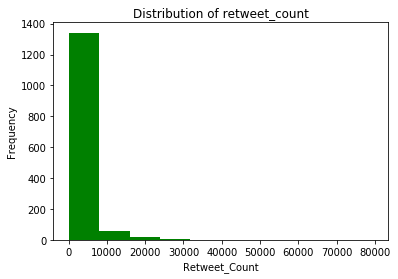

In [51]:
all_rate_image_data['retweet_count'].plot(kind='hist', color="green");
plt.title('Distribution of retweet_count');
plt.xlabel('Retweet_Count');

# Insight 2: Find the average favorite count

In [52]:
avg_favorite_count = all_rate_image_data['favorite_count'].mean()
round(avg_favorite_count)

9437.0

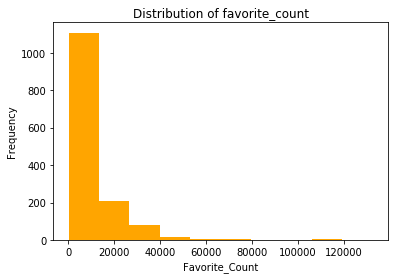

In [53]:
all_rate_image_data['favorite_count'].plot(kind='hist', color="orange");
plt.title('Distribution of favorite_count');
plt.xlabel('Favorite_Count');

# Insight 3: Find the average reweet counts for each dog stages

In [54]:
dog_stage_retweet_avg = all_rate_image_data.groupby("dog_stage")['retweet_count'].mean()
round(dog_stage_retweet_avg.sort_values(ascending=False), 2)

dog_stage
doggo      7370.30
puppo      6551.47
floofer    4968.71
pupper     2561.73
Name: retweet_count, dtype: float64

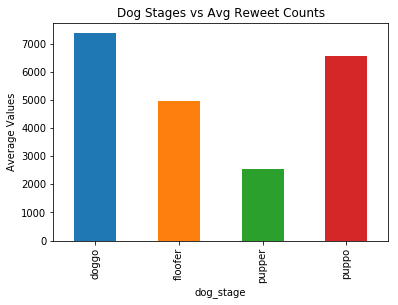

In [55]:
#plot it out
dog_stage_retweet_avg.plot(kind='bar');
plt.title('Dog Stages vs Avg Reweet Counts');
plt.ylabel('Average Values');

### Insights:
1. The average retweet count for all dogs is 2834.6

2. The average favorite count for all dogs is 9437

3. Dogs in the doggo stage has the highest average retweet counts of 7370.30

### Visualization

# Insight 4: Percentage distributions of each dog stages by counting

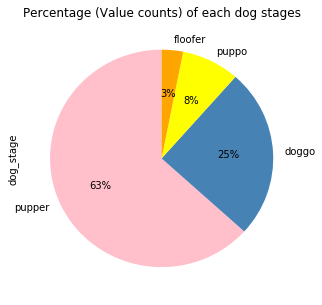

In [56]:
all_rate_image_data["dog_stage"].value_counts().plot(kind='pie', figsize= (5,5), autopct='%1.0f%%',startangle=90,colors = ['pink','steelblue','yellow','orange']);
plt.title('Percentage (Value counts) of each dog stages');

# Create a word cloud showing most frquent word in the text column

In [57]:
# create stopwords variable to set STOPWORDS
stopwords = set(STOPWORDS)

In [58]:
# instantiate a word cloud object
text_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords)

# generate the word cloud
text_wc.generate(str(all_rate_image_data['text']))

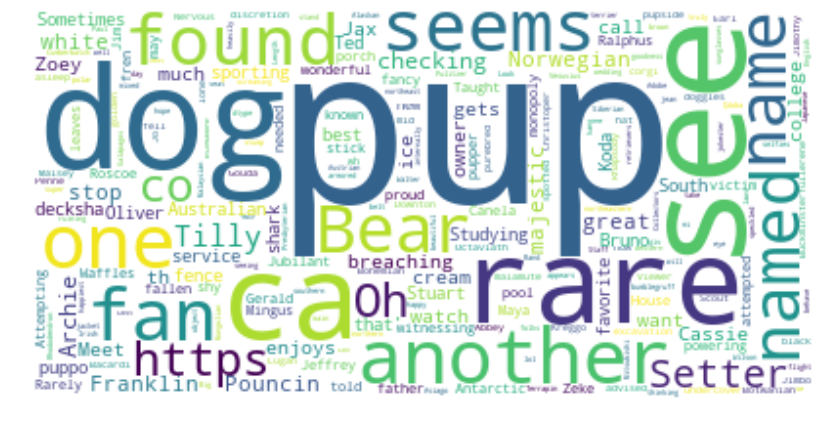

In [59]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the word cloud
plt.imshow(text_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### The words [dog, Pup, rare ] among others appears most in the text that people wrote on their tweets

# Conclusion and Limitations

### While the average  favorite counts  is higher than retweet counts.  Doggo dogs has the highest average retweet numbers.




### There are still many quality issues with the data. Columns such as dog names,dog stage are still unclean

### References: Cognitivlab.ai